In [8]:
import pandas as pd

# setup
from mlwpy import *
%matplotlib inline
from sklearn import datasets
import  sklearn.model_selection  as skms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [20]:
iris = datasets.load_iris()
tts = skms.train_test_split(iris.data, iris.target,test_size=.33, random_state=21)
(iris_train_ftrs, iris_test_ftrs,iris_train_tgt,iris_test_tgt) = tts

iris_test_tgt


array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1,
       1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 0, 0, 0, 1, 0])

In [11]:
#THE MSE(mean squared error works in this way : it finds the diff between the predicted and the actual value , squares them and then finds their mean)
baseline = dummy.DummyClassifier(strategy="most_frequent")
baseline.fit(iris_train_ftrs, iris_train_tgt)
base_preds = baseline.predict(iris_test_ftrs)

base_acc = metrics.accuracy_score(base_preds, iris_test_tgt)
print(base_acc)

0.3


In [14]:
strategies = ['constant', 'uniform', 'stratified',
'prior', 'most_frequent']

# set up args to create different DummyClassifier strategies
baseline_args = [{'strategy':s} for s in strategies]
baseline_args[0]['constant'] = 0 # class 0 is setosa
accuracies = []
for bla in baseline_args:
    baseline = dummy.DummyClassifier(**bla)
    baseline.fit(iris_train_ftrs, iris_train_tgt)
    base_preds = baseline.predict(iris_test_ftrs)
    accuracies.append(metrics.accuracy_score(base_preds, iris_test_tgt))

display(pd.DataFrame({'accuracy':accuracies}, index=strategies))


,accuracy
constant,0.3600
uniform,0.4000
stratified,0.3600
prior,0.3000
most_frequent,0.3000


In [16]:
knn = neighbors.KNeighborsClassifier()

accuracy: 0.94
[1 0 0 0 1 1 0 1 0 0 1 1 2 2 0 1 1 1 0 2 2 1 2 1 0 1 0 0 1 2 0 2 1 0 2 1 1
 2 0 2 2 2 2 1 2 0 0 0 1 0]


,0,1,2
0,18,0,0
1,0,16,1
2,0,2,13


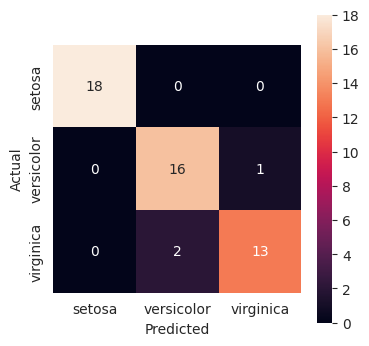

In [28]:
tgt_preds = (neighbors.KNeighborsClassifier()
             .fit(iris_train_ftrs, iris_train_tgt)
             .predict(iris_test_ftrs))

print("accuracy:", metrics.accuracy_score(iris_test_tgt,tgt_preds))
cm = metrics.confusion_matrix(iris_test_tgt,tgt_preds)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
cm = metrics.confusion_matrix(iris_test_tgt, tgt_preds)
ax = sns.heatmap(cm, annot=True, square=True,
xticklabels=iris.target_names,
yticklabels=iris.target_names)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

print(tgt_preds)
confusion_matrix_df = pd.DataFrame(cm)

confusion_matrix_df


In [29]:
n_labels = len(iris.target_names)
print("should equal 'macro avg':",
# correct    columnb      columns
(np.diag(cm) / cm.sum(axis=0)).sum() / n_labels)

should equal 'macro avg': 0.9391534391534391
